# kerasを利用した手書き文字分類

ニューラルネットワークを構築する為のtensorflowラッパーライブラリkerasを利用した実装

### データセット

In [1]:
# データセット https://keras.io/ja/datasets/
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

In [3]:
#色濃度1~256[0,255]の値を0~1[0,1]に正規化
X_train /= 255.0
X_test /= 255.0

In [4]:
# 1 of Kのベクトルに変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [5]:
print('中身')
print(X_train)
print(y_train)

print('形状')
print(X_train.shape)
print(y_train.shape)

中身
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
形状
(60000, 784)
(60000, 10)


### モデル

In [6]:
# モデルの作成 https://keras.io/ja/models/model/
from keras.models import Sequential
# 層の作成 https://keras.io/ja/layers/core/#dense
from keras.layers import Dense
# 活性化関数 https://keras.io/ja/activations/
from keras.layers import Activation
# より高度な活性化関数
# from keras.layers.advanced_activations import PReLU, LearkyReLU

In [7]:
# モデルの作成
model = Sequential()

# 入力層と中間層の接続
model.add(Dense(64, input_dim=784))

# 中間層の活性化関数の選択
model.add(Activation("relu"))

# 中間層と出力層の接続
model.add(Dense(10))

# 出力層の活性化関数の選択
model.add(Activation("softmax"))

### 学習プロセス



In [8]:
# 最適化アルゴリズム https://keras.io/ja/optimizers/
from keras.optimizers import SGD

# https://keras.io/ja/models/model/#compile
model.compile(
    # 目的関数 https://keras.io/ja/objectives/
    loss="categorical_crossentropy",
    # 最適化アルゴリズム 確率的勾配降下法
    optimizer=SGD(
        lr=1e-2,
        momentum=0.9,
        nesterov=True
    ),
    # モデルにより評価されるメトリクスのリスト
    metrics=["accuracy"]
)

### トレーニング



In [9]:
# callback
from keras.callbacks import ModelCheckpoint

history = model.fit(
    X_train,
    y_train,
    # 学習回数
    epochs=20,
    # テストデータ率
    validation_split=0.2,
    # ミニバッチ個数 データをbatch_size個に分けて学習
    batch_size=32,
    # モデルの保存callback
    callbacks=[ModelCheckpoint("model.hdf5")]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s - loss: 0.3574 - acc: 0.8966 - val_loss: 0.2066 - val_acc: 0.9425
Epoch 2/20
48000/48000 [==============================] - 4s - loss: 0.1852 - acc: 0.9465 - val_loss: 0.1629 - val_acc: 0.9527
Epoch 3/20
48000/48000 [==============================] - 5s - loss: 0.1380 - acc: 0.9599 - val_loss: 0.1358 - val_acc: 0.9610
Epoch 4/20
48000/48000 [==============================] - 5s - loss: 0.1124 - acc: 0.9675 - val_loss: 0.1373 - val_acc: 0.9583
Epoch 5/20
48000/48000 [==============================] - 5s - loss: 0.0958 - acc: 0.9724 - val_loss: 0.1169 - val_acc: 0.9640
Epoch 6/20
48000/48000 [==============================] - 4s - loss: 0.0823 - acc: 0.9768 - val_loss: 0.1079 - val_acc: 0.9677
Epoch 7/20
48000/48000 [==============================] - 4s - loss: 0.0721 - acc: 0.9788 - val_loss: 0.1060 - val_acc: 0.9673
Epoch 8/20
48000/48000 [==============================] - 4s 

### モデルの評価



In [10]:
loss_and_metrics = model.evaluate(
    X_test,
    y_test
)
print("loss:{} accuracy:{}".format(
    loss_and_metrics[0],
    loss_and_metrics[1]
))

 9056/10000 [==========================>...] - ETA: 0sloss:0.09086544470982626 accuracy:0.9735


### モデル構造の可視化



In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True
)

### トレーニングの可視化



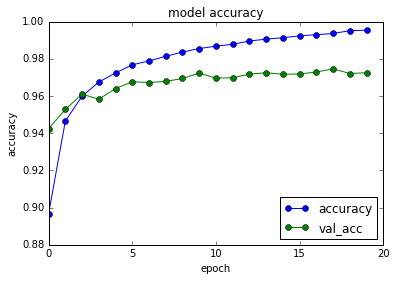

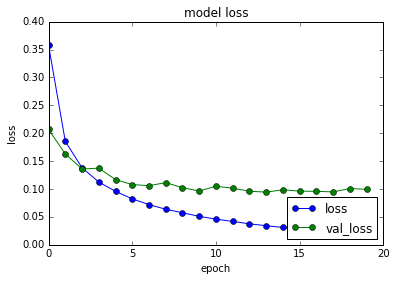

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

# modelに学習させた時の変化の様子をplot
plot_history(history)